<a href="https://colab.research.google.com/github/BDouchet/Spotify_dataset/blob/main/popularity_regression/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='16phKfXvRrwGbOJrNKpgbYnBnZG6icXFX'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.zip')

with ZipFile('dataset.zip', 'r') as zip:
   zip.extractall()
   print('Done')

df=pd.read_csv('dataset/Spotify_exo2.csv')

X=df.drop(['genres','popularity'],axis=1).to_numpy()
Y=df['popularity'].to_numpy()

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

Done
(2378, 12) (2378,) (595, 12) (595,)


# Create Train Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
ss=StandardScaler()

x_train=ss.fit_transform(X_train)
x_test=ss.fit_transform(X_test)

y_train=(Y_train - np.mean(Y))/np.std(Y)
y_test=(Y_test - np.mean(Y))/np.std(Y)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2378, 12) (595, 12) (2378,) (595,)


## NN1

In [ ]:
nn=models.Sequential()

nn.add(layers.Dense(64,activation='relu',input_shape=(12,)))
nn.add(layers.BatchNormalization())

nn.add(layers.Dense(64,activation='relu'))
nn.add(layers.BatchNormalization())

nn.add(layers.Dense(64,activation='relu'))
nn.add(layers.BatchNormalization())

nn.add(layers.Dense(1,activation='linear'))

nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                832       
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
nn.compile(optimizer='Adam',metrics=['mae'],loss='mse')
history=nn.fit(x_train,y_train,epochs=30,batch_size=128,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
19/19 - 1s - loss: 1.6014 - mae: 0.9261 - val_loss: 0.9084 - val_mae: 0.7186
Epoch 2/30
19/19 - 0s - loss: 0.7549 - mae: 0.6508 - val_loss: 0.8487 - val_mae: 0.6905
Epoch 3/30
19/19 - 0s - loss: 0.5853 - mae: 0.5750 - val_loss: 0.8052 - val_mae: 0.6640
Epoch 4/30
19/19 - 0s - loss: 0.5169 - mae: 0.5367 - val_loss: 0.7636 - val_mae: 0.6407
Epoch 5/30
19/19 - 0s - loss: 0.4702 - mae: 0.5058 - val_loss: 0.7426 - val_mae: 0.6310
Epoch 6/30
19/19 - 0s - loss: 0.4372 - mae: 0.4912 - val_loss: 0.7056 - val_mae: 0.6145
Epoch 7/30
19/19 - 0s - loss: 0.4215 - mae: 0.4777 - val_loss: 0.6706 - val_mae: 0.5974
Epoch 8/30
19/19 - 0s - loss: 0.4025 - mae: 0.4661 - val_loss: 0.6379 - val_mae: 0.5816
Epoch 9/30
19/19 - 0s - loss: 0.3783 - mae: 0.4579 - val_loss: 0.6030 - val_mae: 0.5576
Epoch 10/30
19/19 - 0s - loss: 0.3651 - mae: 0.4450 - val_loss: 0.5825 - val_mae: 0.5492
Epoch 11/30
19/19 - 0s - loss: 0.3581 - mae: 0.4410 - val_loss: 0.5581 - val_mae: 0.5346
Epoch 12/30
19/19 - 0s - loss:

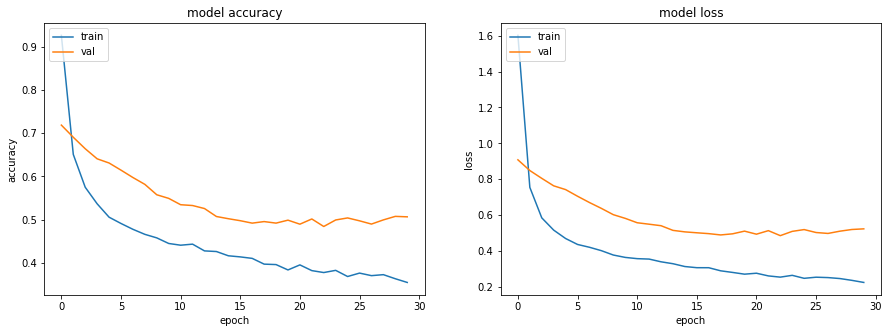

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')

plt.show()

In [ ]:
yhat_test=nn.predict(x_test)*np.std(Y)+np.mean(Y)
yhat_train=nn.predict(x_train)*np.std(Y)+np.mean(Y)


print("----- MAE -----")
print(mean_absolute_error(Y_train,yhat_train))
print(mean_absolute_error(Y_test,yhat_test))
print()
print("----- R2 -----")
print(r2_score(Y_train,yhat_train))
print(r2_score(Y_test,yhat_test))

----- MAE -----
5.20082680330495
8.482835543506923

----- R2 -----
0.8191048221661301
0.45228484665728097


## NN2

In [ ]:
nn2=models.Sequential()

nn2.add(layers.Dense(64,activation='relu',input_shape=(12,)))
nn2.add(layers.BatchNormalization())
nn2.add(layers.Dropout(0.2))

nn2.add(layers.Dense(128,activation='relu'))
nn2.add(layers.BatchNormalization())
nn2.add(layers.Dropout(0.2))

nn2.add(layers.Dense(64,activation='relu'))
nn2.add(layers.BatchNormalization())
nn2.add(layers.Dropout(0.2))

nn2.add(layers.Dense(1,activation='linear'))

nn2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 64)                832       
_________________________________________________________________
batch_normalization_66 (Batc (None, 64)                256       
_________________________________________________________________
dropout_51 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_84 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_67 (Batc (None, 128)               512       
_________________________________________________________________
dropout_52 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 64)              

In [ ]:
nn2.compile(optimizer='Adam',metrics=['mae'],loss='mse')
history2=nn2.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test),verbose=2,shuffle=True)

Epoch 1/100
19/19 - 1s - loss: 2.5860 - mae: 1.2025 - val_loss: 0.9253 - val_mae: 0.7001
Epoch 2/100
19/19 - 0s - loss: 1.6400 - mae: 0.9671 - val_loss: 0.9149 - val_mae: 0.6851
Epoch 3/100
19/19 - 0s - loss: 1.4097 - mae: 0.8904 - val_loss: 0.9309 - val_mae: 0.6871
Epoch 4/100
19/19 - 0s - loss: 1.2520 - mae: 0.8375 - val_loss: 0.8880 - val_mae: 0.6684
Epoch 5/100
19/19 - 0s - loss: 1.0848 - mae: 0.7805 - val_loss: 0.8539 - val_mae: 0.6540
Epoch 6/100
19/19 - 0s - loss: 1.0491 - mae: 0.7644 - val_loss: 0.8354 - val_mae: 0.6454
Epoch 7/100
19/19 - 0s - loss: 0.9916 - mae: 0.7424 - val_loss: 0.8078 - val_mae: 0.6414
Epoch 8/100
19/19 - 0s - loss: 0.9508 - mae: 0.7334 - val_loss: 0.7421 - val_mae: 0.6102
Epoch 9/100
19/19 - 0s - loss: 0.8989 - mae: 0.7076 - val_loss: 0.7267 - val_mae: 0.6077
Epoch 10/100
19/19 - 0s - loss: 0.8856 - mae: 0.7015 - val_loss: 0.6931 - val_mae: 0.5931
Epoch 11/100
19/19 - 0s - loss: 0.8519 - mae: 0.6801 - val_loss: 0.6476 - val_mae: 0.5737
Epoch 12/100
19/19 

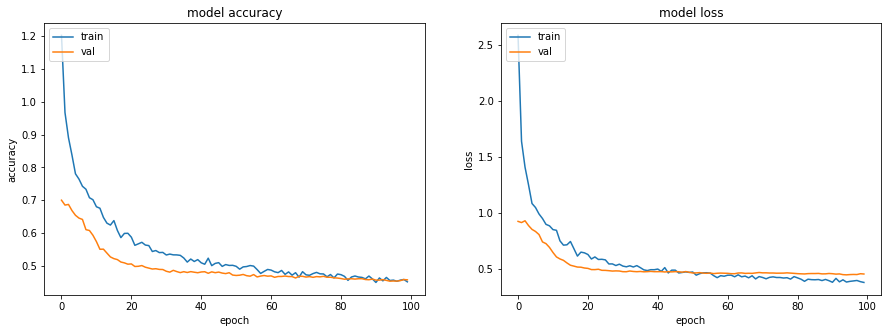

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.plot(history2.history['mae'])
ax1.plot(history2.history['val_mae'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history2.history['loss'])
ax2.plot(history2.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')

plt.show()

In [ ]:
yhat_test=nn2.predict(x_test)*np.std(Y)+np.mean(Y)
yhat_train=nn2.predict(x_train)*np.std(Y)+np.mean(Y)


print("----- MAE -----")
print(mean_absolute_error(Y_train,yhat_train))
print(mean_absolute_error(Y_test,yhat_test))
print()
print("----- R2 -----")
print(r2_score(Y_train,yhat_train))
print(r2_score(Y_test,yhat_test))

----- MAE -----
6.246690421692094
7.657933924478307

----- R2 -----
0.7280205741129677
0.52379548828275


## NN3

In [ ]:
nn3=models.Sequential()

nn3.add(layers.Dense(64,activation='relu',input_shape=(12,)))
nn3.add(layers.BatchNormalization())
nn3.add(layers.Dropout(0.3))

nn3.add(layers.Dense(128,activation='relu'))
nn3.add(layers.BatchNormalization())
nn3.add(layers.Dropout(0.3))

nn3.add(layers.Dense(256,activation='relu'))
nn3.add(layers.BatchNormalization())
nn3.add(layers.Dropout(0.3))

nn3.add(layers.Dense(256,activation='relu'))
nn3.add(layers.BatchNormalization())
nn3.add(layers.Dropout(0.3))

nn3.add(layers.Dense(128,activation='relu'))
nn3.add(layers.BatchNormalization())
nn3.add(layers.Dropout(0.3))

nn3.add(layers.Dense(64,activation='relu'))
nn3.add(layers.BatchNormalization())
nn3.add(layers.Dropout(0.3))

nn3.add(layers.Dense(1,activation='linear'))

nn3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 64)                832       
_________________________________________________________________
batch_normalization_69 (Batc (None, 64)                256       
_________________________________________________________________
dropout_54 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_70 (Batc (None, 128)               512       
_________________________________________________________________
dropout_55 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 256)             

In [ ]:
nn3.compile(optimizer='Adam',metrics=['mae'],loss='mse')
history3=nn3.fit(x_train,y_train,epochs=200,batch_size=128,validation_data=(x_test,y_test),verbose=0,shuffle=True)

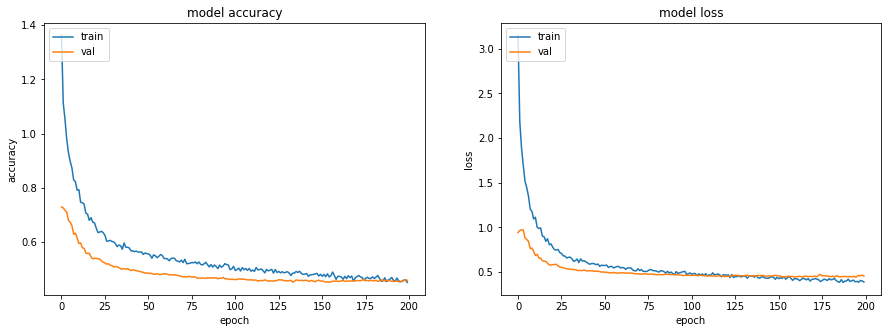

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.plot(history3.history['mae'])
ax1.plot(history3.history['val_mae'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')

plt.show()

In [ ]:
yhat_test=nn2.predict(x_test)*np.std(Y)+np.mean(Y)
yhat_train=nn2.predict(x_train)*np.std(Y)+np.mean(Y)


print("----- MAE -----")
print(mean_absolute_error(Y_train,yhat_train))
print(mean_absolute_error(Y_test,yhat_test))
print()
print("----- R2 -----")
print(r2_score(Y_train,yhat_train))
print(r2_score(Y_test,yhat_test))

----- MAE -----
6.246690421692094
7.657933924478307

----- R2 -----
0.7280205741129677
0.52379548828275
